# Fast Approximate Quadratic Assignment Problem (FAQ)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The graph matching problem (GMP), is meant to find an allignment of nodes between two graphs that minimizes the number of edge disagreements between those two graphs. Therefore, the GMP can be formally written as an optimization problem: 

\begin{equation}
\begin{aligned}
\min & {\;-trace(APB^T P^T)}\\
\text{s.t. } & {\;P \: \epsilon \: \mathcal{P}} \\
\end{aligned}
\end{equation}

Where $\mathcal{P}$ is the set of possible permutation matrices.

The Quadratic Assignment problem is a combinatorial opimization problem, modeling following the real-life problem: 

"Consider the problem of allocating a set of facilities to a set of locations, with the
cost being a function of the distance and flow between the facilities, plus costs associated
with a facility being placed at a certain location. The objective is to assign each facility
to a location such that the total cost is minimized." [1]

When written as an optimization problem, the QAP is represented as:

\begin{equation}
\begin{aligned}
\min & {\; trace(APB^T P^T)}\\
\text{s.t. } & {\;P \: \epsilon \: \mathcal{P}} \\
\end{aligned}
\end{equation}

Since the GMP objective function is the negation of the QAP objective function, any algorithm that solves one can solve the other. 


This class is an implementation of the Fast Approximate Quadratic Assignment Problem (FAQ), an algorithm designed to efficiently and accurately solve the QAP, as well as GMP. 

[1] Optimierung, Diskrete & Er, Rainer & Ela, A & Burkard, Rainer & Dragoti-Cela, Eranda & Pardalos, Panos & Pitsoulis, Leonidas. (1998). The Quadratic Assignment Problem. Handbook of Combinatorial Optimization. 10.1007/978-1-4613-0303-9_27. 

In [3]:
from graspy.match import FastApproximateQAP as FAQ
from graspy.simulations import er_np

For the sake of tutorial, we will use FAQ to solve the GMP for two graphs where we know a solution exists. 
Below, we sample a binary graph (undirected and no self-loops) $G_1 \sim ER_{NP}(50, 0.3)$.
Then, we randomly shuffle the nodes of $G_1$ to initiate $G_2$.
The number of edge disagreements as a result of the node shuffle is printed below.

In [11]:
n = 50
p = 0.3

np.random.seed(1)
G1 = er_np(n=n, p=p)
node_shuffle_input = np.random.permutation(n)
G2 = G1[np.ix_(node_shuffle_input, node_shuffle_input)]
print("Number of edge disagreements: ", sum(sum(abs(G1-G2))))

Number of edge disagreements:  1012.0


## Visualize the graphs using heat mapping

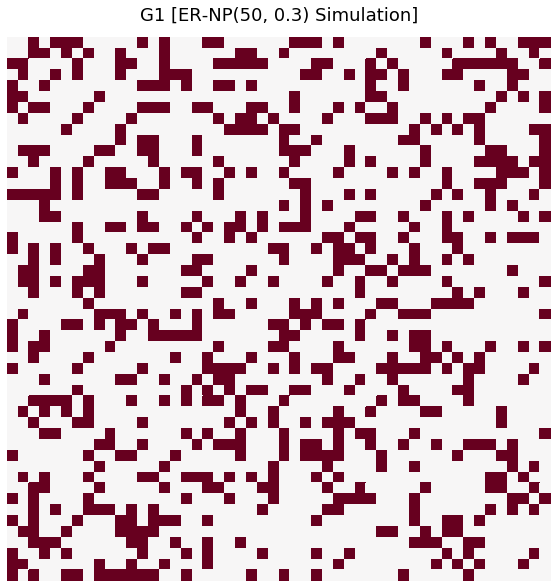

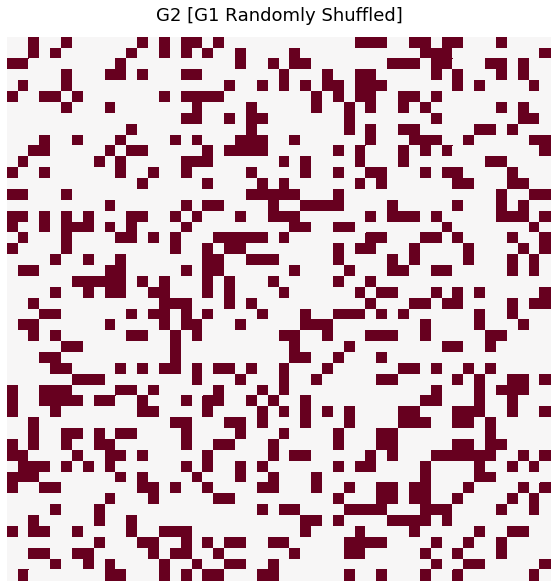

In [5]:
from graspy.plot import heatmap
heatmap(G1, cbar=False, title = 'G1 [ER-NP(50, 0.3) Simulation]')
heatmap(G2, cbar=False, title = 'G2 [G1 Randomly Shuffled]')

Below, we create a model to solve GMP. The model is then fitted for the two graphs $G_1$ and $G_2$. One of the option for the algorithm is the starting position of $P$. In this case, the class default of barycenter intialization is used, or the flat doubly stochastic matrix. The number of edge disagreements is printed below. With zero edge disagreements, we see that FAQ is successful in unshuffling the graph.

In [13]:
gmp = FAQ(gmp=True)
gmp = gmp.fit(G1,G2)
G2 = G2[np.ix_(gmp.perm_inds_, gmp.perm_inds_)]
print("Number of edge disagreements: ", sum(sum(abs(G1-G2))))

Number of edge disagreements:  0.0


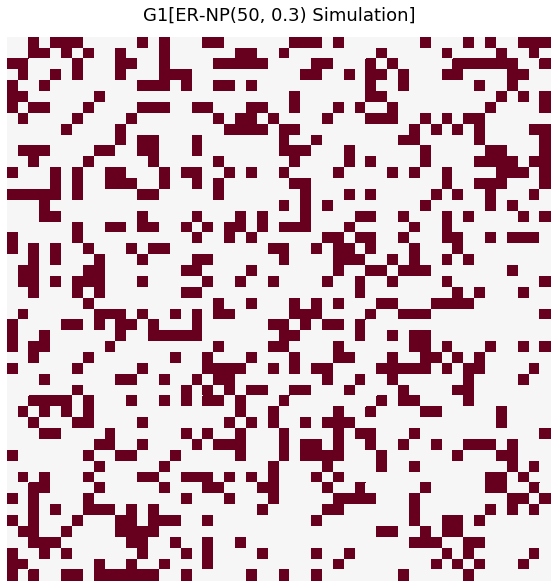

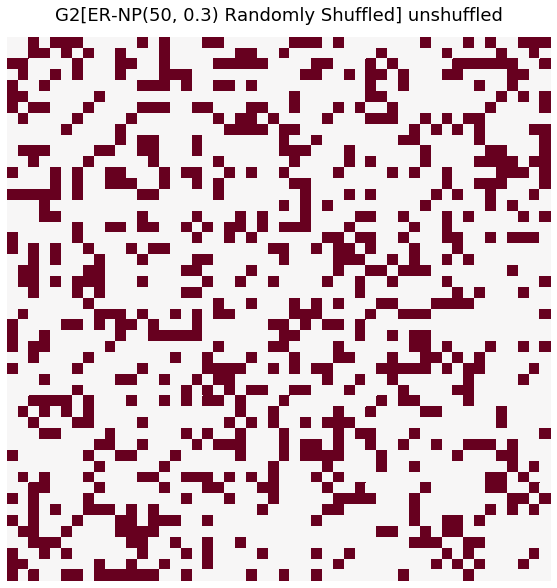

In [7]:
heatmap(G1, cbar=False, title = 'G1[ER-NP(50, 0.3) Simulation]')
heatmap(G2, cbar=False, title = 'G2[ER-NP(50, 0.3) Randomly Shuffled] unshuffled')